<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Mecanismos de Votación
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y `csv`).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción


Para esta actividad desarrollaremos un ensamble heterogéneo que prediga la popularidad o inpopularidad de contenido en línea de un sitio web. El archivo csv tiene un total de 39797 registros, donde cada uno representa características del artículo publicado en el sitio web. Cada registro tiene un total de 61 atributos que miden características del texto, cantidad de imágenes, keywords, etc. Los artículos provienen de la publicación K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal. Los artículos registrados son de la página web www.mashable.com.

Más información sobre los atributos se puede encontrar en el archivo `OnlineNewsPopularity.name`.

## Ejercicio 1: Preprocesamiento

* A continuación se le presenta un código que agrupa las variables por grupos. Cada uno de éstos hace referencia a alguna característica de los registros en la base de datos. Genere una análisis descriptivo de cada uno de los atributos. Puede utilizar la función grid_plot_batch que se encuentra en el archivo helpers.py .

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings
# Se importa libreria para el trabajo de expresiones reguilares
import re

> Definimos algunos aspectos de ambiente y valores por defecto de visualización.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utiliza <strong>librería helpers.py</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [4]:
import helpers as hlp

> Cargamos la base de datos

In [5]:
# Se carga la base de datos y se elimina la columna 'Unnamed: 0' que no aporta valor al análisis.
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [6]:
# Inspeccionamos los nombres de las columnas
print([i for i in df.columns])

['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', '

In [7]:
# las etiquetas de las columnas presentan un espacio extra, con ésto lo podemos eliminar
df.columns = [i.replace(' ', '') for i in df.columns]

In [8]:
print([i for i in df.columns])

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

In [9]:
df.sample(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
30541,http://mashable.com/2014/08/08/sup-yahoo/,152.0,11.0,962.0,0.439331,1.0,0.675197,12.0,3.0,1.0,0.0,4.577963,6.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1400.0,468.333333,6000.0,843300.0,309366.666667,3224.586149,5339.635220,3916.787556,5400.0,5400.0,5400.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.866666,0.033334,0.033333,0.033333,0.033333,0.459335,0.140910,0.047817,0.018711,0.718750,0.281250,0.387778,0.05,1.0,-0.269444,-0.7,-0.050,0.025,0.15,0.475,0.15,3000
32077,http://mashable.com/2014/09/04/first-day-of-sc...,126.0,10.0,594.0,0.487179,1.0,0.669697,3.0,3.0,1.0,1.0,4.402357,5.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,758.0,188.750000,0.0,843300.0,320700.000000,0.000000,3481.799712,2482.649498,1000.0,5800.0,2700.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.040002,0.440327,0.040003,0.040002,0.439666,0.497940,0.106019,0.040404,0.021886,0.648649,0.351351,0.364989,0.10,1.0,-0.291453,-0.6,-0.050,0.500,0.50,0.000,0.50,621
21146,http://mashable.com/2014/02/27/shanghai-bans-t...,315.0,9.0,324.0,0.621359,1.0,0.768116,14.0,0.0,1.0,0.0,4.864198,6.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1100.0,356.500000,6900.0,843300.0,202133.333333,2184.663069,5152.244898,3071.873620,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.033334,0.033334,0.683159,0.033485,0.216688,0.448099,0.044444,0.021605,0.021605,0.500000,0.500000,0.452381,0.10,1.0,-0.284127,-0.9,-0.050,0.050,0.00,0.450,0.00,1400
35170,http://mashable.com/2014/10/21/dyson-humidifier/,78.0,12.0,230.0,0.662281,1.0,0.800000,4.0,2.0,1.0,0.0,4.708696,3.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,-1.000000,5400.0,843300.0,513033.333333,1926.269231,3443.120085,2851.111016,3200.0,3800.0,3500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.731327,0.066669,0.066668,0.066667,0.068669,0.458775,0.057513,0.026087,0.013043,0.666667,0.333333,0.235606,0.10,0.5,-0.197222,-0.3,-0.125,0.000,0.00,0.500,0.00,1200
26253,http://mashable.com/2014/06/02/watch-wwdc-2014...,219.0,7.0,211.0,0.598086,1.0,0.739837,2.0,2.0,1.0,1.0,4.417062,6.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,2000.0,749.333333,2000.0,843300.0,208933.333333,2000.000000,8345.272727,3626.781557,701.0,2000.0,1350.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033335,0.283623,0.033335,0.616372,0.033334,0.373643,0.051989,0.056872,0.042654,0.571429,0.428571,0.303977,0.10,0.5,-0.266667,-0.4,-0.100,0.000,0.00,0.500,0.00,851


In [10]:
# eliminamos el string de url que no sirve para el análisis
df.drop(columns='url', inplace=True)

In [11]:
# generamos el conjunto de variables
qnty = df.filter(regex='^n_', axis=1)
channel = df.filter(regex='^data_', axis=1)
days = df.filter(regex=re.compile("weekday|weekend"), axis=1)
sentiments = df.filter(regex=re.compile("negative|positive|subjectivity"), axis=1)
lda = df.filter(regex='^LDA_\d', axis=1)
keywords = df.filter(regex='^kw_', axis=1)

> qnty

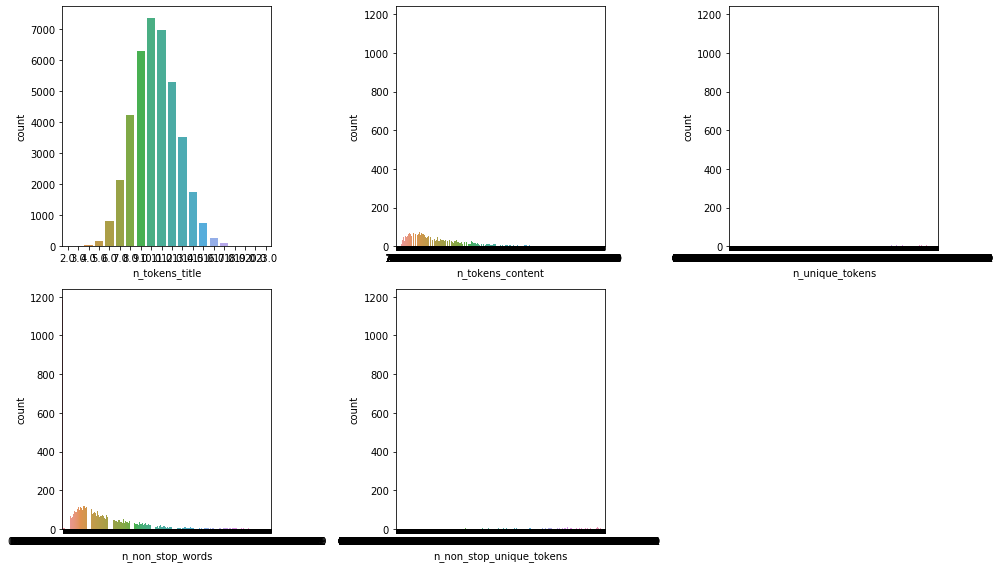

In [26]:
hlp.grid_plot_batch(qnty, 3, sns.countplot)

> channel

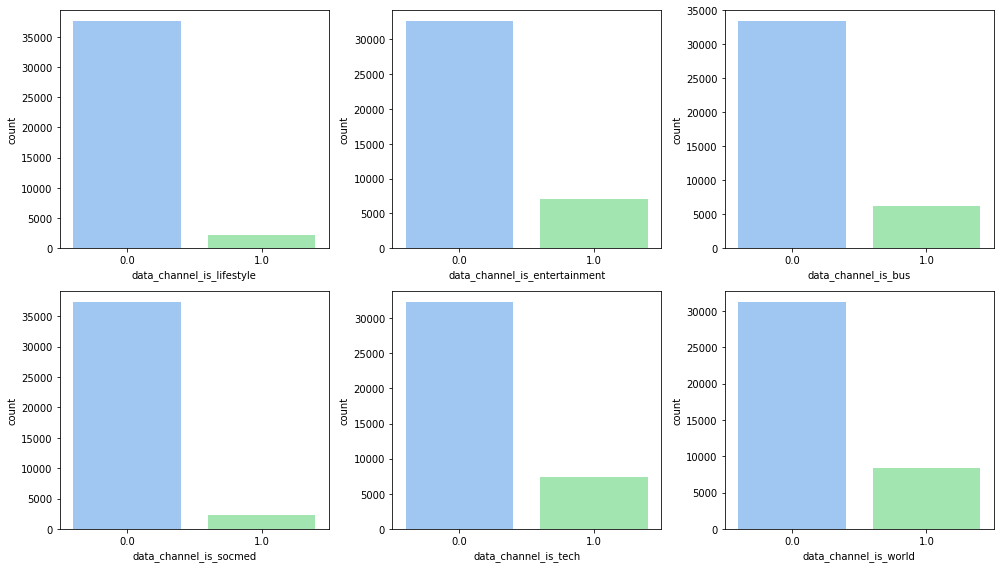

In [25]:
hlp.grid_plot_batch(channel, 3, sns.countplot)

> days

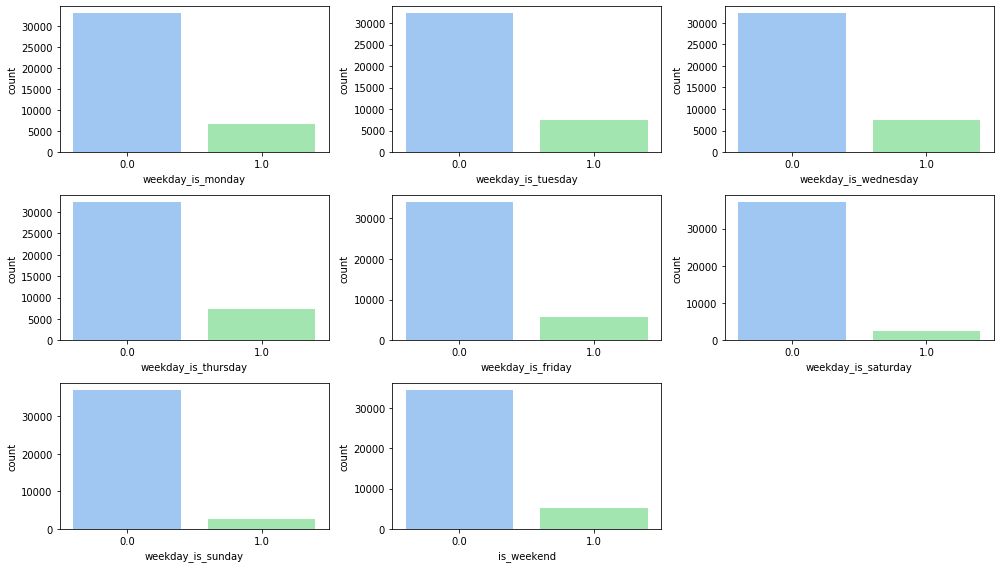

In [24]:
hlp.grid_plot_batch(days, 3, sns.countplot)

> sentiments

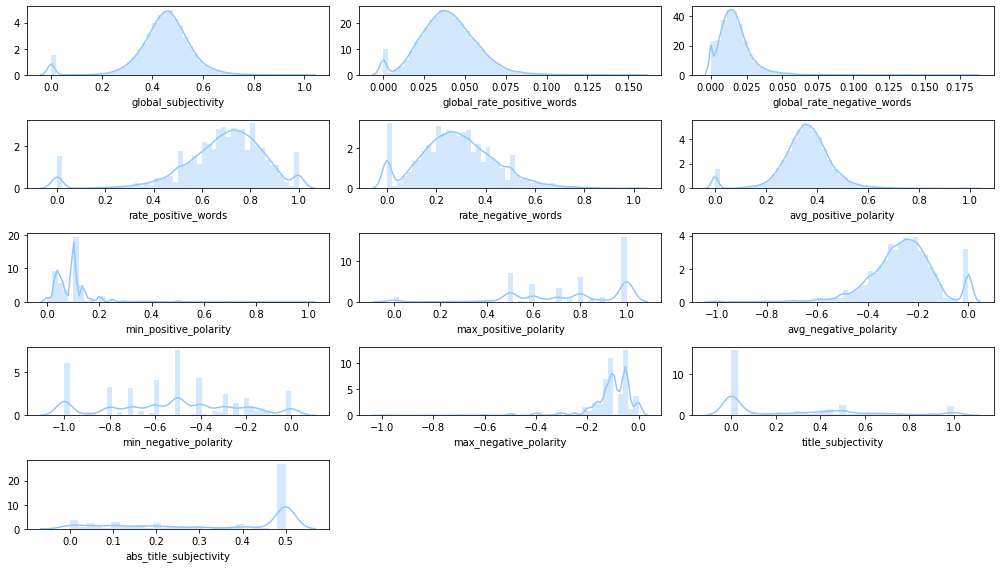

In [23]:
hlp.grid_plot_batch(sentiments, 3, sns.distplot)

* Describa el comportamiento de las variables.
* Dada la naturaleza de los atributos, es probable que algunas mediciones estén correlacionadas entre sí. Para ello, genere un diagnóstico previo de multicolinealidad utilizando la función identify_high_correlations que se encuentra en el archivo helpers.py . Para todos aquellos atributos que tengan una correlación de .8, reporte sus nombres.
* Antes de generar los conjuntos de entrenamiento y validación, preprocese los datos con los siguientes pasos:
  * Recodifique la variable shares en una variable binaria que identifique como 1 todos los registros con más de 1400 "compartir" y 0 de lo contrario. Para evitar multicolinealidad, elimine la variable shares posteriormente.
  * Elimine todas las variables que presentaban una correlación mayor a .8. Este paso es para evitar la multicolinealidad de los atributos.
  * Genere un análisis de Componentes Principales para extraer las principales 30 dimensiones. Guarde estas dimensiones en un nuevo objeto.


> Revisamos tipos de datos para determinar el tratamiento de los datos y visualizamos los datos perdidos:

In [ ]:
df.info()

> Si bien con el método info() podemos ver que todas las columnas son non-null, es decir que no presentan datos perdidos, para efectos visuales se revisan los datos perdidos con la el método matrix() de msngo.

In [ ]:
msngo.matrix(df)

> No se observan datos perdidos en la base de datos, podemos seguir con el análisis.

In [ ]:
# Revisamos las dimensiones de la base de datos
df.shape

> Revisamos nuestro vector objetivo __churn__ (1 si el cliente se cambió de compañia, 0 de los contrario)

In [ ]:
np.round(df['churn'].value_counts('%'), 2)

> La base de datos se compone de 3333 observaciones con 19 atributos y el vector de clases [churn]. Podemos observar que hay un desbalanceo de clases en la muestra ya que vemos que hay un 86% de datos etiquetados con la __clase no__ (cliente no se cambia de compañía) y un 14% con la __clase yes__ (cliente se cambia de compañía).

In [ ]:
# Revisamos gráficamente el desbalance de clases de nuestro vector objetivo
plt.figure(figsize=(8,6))
sns.countplot(x='churn', data=df)

> Ahora revisamos los atributos o variables independientes.

Para no deteriorar la calidad de la visualización, separamos el atributo state ya que el gráfico de ocurrencias presenta muchos valores y no queremos que se vea un gráfico saturado.

In [ ]:
sns.countplot(df['state'])
plt.xticks(rotation=40, ha="right");

In [ ]:
np.round(df['state'].value_counts().mean(), 2)

> El atributo __state__ no tiene mucha variación en la distribución y las muestras por Estado están en torno a 65. Es decir que se tomaron en promedio 65 muestras por estado.

In [ ]:
df['state'].value_counts().mean()

___
> Ahora revisamos el resto de atributos

In [ ]:
# Generamos una grilla con los gráficos de distribución del resto de atributos.
plt.figure(figsize=(20,20))
row = 5
col = df.shape[1]//row
# Recorremos el listado de atributos except churn y state que ya fueron analizados.
for index, (colname, serie) in enumerate(df.drop(columns=['churn', 'state']).iteritems()):
    plt.subplot(row, col, index+1)
    # Si el atributo es categórico se usa un grafico de ocurrencias
    if serie.dtype == 'object':
        sns.countplot(serie)
    # Sino, se utiliza un grafico de distribución
    else:
        sns.distplot(serie)
    plt.title(colname)
    plt.tight_layout()

> Las variables categóricas (area_code, international_plan y voice_mail_plan) presentan un desbalance considerable de ocurrencias, pero usaremos resampling para no alejarnos del objetivo del ejercicio. Estas variables, junto a state, serán recodificadas en valores binarios para lograr una mejor representación en el modelo predictivo.
>
> Respecto a las variables continuas, se observa normalidad en la distribución excepto en los atributos number_vmail_messages, total_intl_calls y number_customer_service_calls que presentan sesgos en valores puntuales. En estos atributos aplicaremos una transformación con el logaritmo de los valores.

___
> Entendiendo la operación de las compañias de teléfono podemos observar que hay una correlación entre la cantidad de minutos y el cobro, por lo que vamos a revisar que tan correlacionados están estos dos atributos:


In [ ]:
max_corr = df.corr().filter(regex='_charge').transpose().filter(regex='_minutes')
max_corr

In [ ]:
sns.heatmap(max_corr, cmap='Greens')
plt.tight_layout()

> Efectivamente hay una correlación muy fuerte (completamente correlacionadas) entre los minutos ocupados y los cobros en los distintos segmentos (day, eve, night, international).
>
> Podríamos estar tentados en sacar uno de los 2 atributos por segmento para evitar el problema de la multicolinealidad de atributos. No obstante vamos a dejar los atributos inicialmente y presentaremos un modelo posterior al ejercicio y evaluaremos el efecto.

* En  base al  comportamiento de  los  atributos,  considere si  es  necesario implementar  algunarecodificación o transformación de atributo. Algunas normas a seguir:
  * Para las variables categóricas, recodifíquelas en variables binarias.
  * Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con sulogaritmo.

___
> Aplicaremos las transformaciones a las variables continuas number_vmail_messages, total_intl_calls y number_customer_service_calls:

In [ ]:
var_cont_log = ['number_vmail_messages', 'total_intl_calls', 'number_customer_service_calls']

In [ ]:
# Aplicamos logaritmo a las variables que presentan sesgo en ciertos valores y graficamos el antes 
# y el después de aplicar la transformación

df_log = df.copy()

for i, var in enumerate(var_cont_log):
    plt.subplot(3,2, i + i + 1)
    sns.distplot(df_log[var])
    df_log[var + '_log'] = np.log(df_log[var] + 0.001)
    plt.subplot(3,2, i + i + 2)
    sns.distplot(df_log[var + '_log'])
    plt.tight_layout()

In [ ]:
# Eliminamos las columnas originales
df_log.drop(columns=var_cont_log, inplace=True)

> Podemos observar que la distribución se mueve un poco, permitiendo anular un poco el sesgo.

___
> Ahora procesamos las variables categóricas:

In [ ]:
# Usamos procesamiento vectorial para transformar el DF
df_proc = pd.get_dummies(df_log, 
               [x for x in df_log.columns if df_log[x].dtype =='object'], 
               dummy_na=False,
               drop_first=True
              )

In [ ]:
# Revisamis la estructura de nuestra nueva base de datos
df_proc.shape

In [ ]:
# Revisamos aleatoreamente los datos
df_proc.sample(5, random_state=14173)

## Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

* Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:


|__Modelo__   | __Grilla__  |
|---|---| 
| AdaBoostClassifier| {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}|
| GradientBoostingClassifier |  {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}|

* Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
* Reporte las métricas para los mejores modelos.

In [ ]:
# Separamos nuestra matriz de atributos
X = df_proc.drop(columns='churn_yes')
# Separamos nuestro vector objetivo
y = df_proc['churn_yes']
# Separamos las muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 14173)

> __AdaBoost:__

In [ ]:
# Parámetros para GridSearchCV
param_ada = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}

In [ ]:
# Implementamos la búsqueda de grilla para el estimados AdaBoostClassifier
grid_ada = GridSearchCV(estimator = AdaBoostClassifier(), 
                        param_grid = param_ada, 
                        cv=5, 
                        n_jobs=-1).fit(X_train, y_train)

In [ ]:
# Guardamos las predicciones del del modelo con el mejor estimador
yhat_ada = grid_ada.best_estimator_.predict(X_test)

In [ ]:
# Reportamos métricas
print("Adaptative Boosting Classifier: ")
print(f"Cantidad de Estimadores: {grid_ada.best_estimator_.n_estimators}")
print(f"Tasa de Aprendizaje: {grid_ada.best_estimator_.learning_rate}\n")
print(classification_report(y_test, yhat_ada))

> __GradientBoosting:__

In [ ]:
# Parámetros para GridSearchCV
param_grad = {'learning_rate': [0.01, 0.1,0.5], 
              'n_estimators': [50, 100, 500, 1000, 2000],
              'subsample': [0.1,0.5,0.9]}

In [ ]:
# Implementamos la búsqueda de grilla para el estimados GradientBoostingClassifier
grid_grad = GridSearchCV(estimator = GradientBoostingClassifier(), 
                         param_grid = param_grad, 
                         cv = 5, 
                         n_jobs = -1).fit(X_train, y_train)

In [ ]:
# Guardamos las predicciones del del modelo con el mejor estimador
yhat_grad = grid_grad.best_estimator_.predict(X_test)

In [ ]:
# Reportamos métricas
print("Gradient Boosting Classifier: ")
print(f"Cantidad de Estimadores: {grid_grad.best_estimator_.n_estimators}")
print(f"Tasa de Aprendizaje: {grid_grad.best_estimator_.learning_rate}")
print(f"Subsample: {grid_grad.best_estimator_.subsample}\n")
print(classification_report(y_test, yhat_grad))

> Comparamos mediante AUC

In [ ]:
afx.plot_roc(grid_ada.best_estimator_, X_test, y_test, "Adaptative Boosting Classifier")
afx.plot_roc(grid_grad.best_estimator_, X_test, y_test, "Gradient Boosting Classifier")
plt.plot([0, 1], ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

__El mejor modelo: Gradient Boosting Classifier__
> Mediante weighted avg de f1-score observamos que Gradient Boosting tiene un desempeño 9 puntos porcentuales por sobre Adaptative Boosting, lo cual es bastante bueno.
> Revisando el área bajo la curva ROC podemos apreciar una mejora considerable al utilizar el estimado Gradient Boosting por sobre Adaptative Boosting.
>
> Respecto al balance en las predicciones correctas, se observa que Gradient Boosting mejora significativamente el balance en la bondad de las predicciones en ambas clases.

## Ejercicio 3: Principales factores asociados

* Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.
* tip: Pueden implementar la función `plot_importance` que se encuentra en la lectura de Bagging y Random Forest.

In [ ]:
afx.plot_importance(grid_grad.best_estimator_, X.columns, top=10)

> Dada las caracteristicas de los atributos de la base de datos podemos suponer que esta data fue capturada alrededor del año 2005, ya que resume los efectos del cobro diferenciado en las llamadas telefónicas. Es por esta razon que el efecto del gasto en llamadas durante la mañana tiene un efecto bastante significativo en la deserción de un cliente y es probable que la competencia haya sido más competente en ese punto.
>
> Claramenre el numero de llamadas a servicio al cliente es un indicador de algún problema en el servicio y por esta razon aparece como un atributo relevante.
>
> El tener el plan internacional activado puede determinar mayores cobros en la factura mensual y como es un servicio de postpago, la no motivación de pagar algo que ya se usó puede estar deteriorando la tendencia de permanecer en la compañia.
>
> Así como las llamadas durante el día, las llamadas durante la tarde debieron tener un valor más elevado respecto a la competencia.
>
> El plan de mensajes de voz activado pudo tener un costo adicional, lo que puede afectar el cobro mensual y así la tendencia a permanecer en la compañia.

## Ejercicio 4: Probabilidad de fuga

* El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga. 
* Implemente el modelo predictivo con el archivo `churn_test.csv`.
* Recuerde que para obtener la probabilidad de clase, debe utilizar la función `predict_proba` del modelo.

In [ ]:
# Cargamos nuestros datos de validación
df_test = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')

In [ ]:
# Aplicamos las transformaciones definidas para el set de datos del ejercicio.
# Aplicamos logaritmo a las variables que presentan sesgo en ciertos valores y graficamos el antes 
# y el después de aplicar la transformación
df_test_log = df_test.copy()
for i, var in enumerate(var_cont_log):
    plt.subplot(3,2, i + i + 1)
    sns.distplot(df_test_log[var])
    df_test_log[var + '_log'] = np.log(df_test_log[var] + 0.001)
    plt.subplot(3,2, i + i + 2)
    sns.distplot(df_test_log[var + '_log'])
    plt.tight_layout()
# Eliminamos las columnas originales
df_test_log.drop(columns=var_cont_log, inplace= True)

In [ ]:
# Usamos procesamiento vectorial para transformar el DataFrame
df_test_proc = pd.get_dummies(df_test_log, 
               [x for x in df_test_log.columns if df_test_log[x].dtype =='object'], 
               dummy_na=False,
               drop_first=True
              )

In [ ]:
# Separamos nuestra matriz de atributos
X_2 = df_test_proc.drop(columns='churn_yes')
# Separamos nuestro vector objetivo
y_2 = df_test_proc['churn_yes']

In [ ]:
# Generamos la predicción con nuestros datos de validación
yhat_2 = grid_grad.best_estimator_.predict(X_2)

In [ ]:
# Reportamos métricas
print("Gradient Boosting Classifier: ")
print(f"Cantidad de Estimadores: {grid_grad.best_estimator_.n_estimators}")
print(f"Tasa de Aprendizaje: {grid_grad.best_estimator_.learning_rate}\n")
print(classification_report(y_2, yhat_2))

> Se observa que con los datos de validación las metricas son un poco mejor que con los datos separados en la muestra anterior. Esto signifoca que el modelo tiene una buena capacidad de generalizar la predicción.

___
* __Probabilidad de fuga, por estado:__
> Ahora vamos a evaluar la probabilidad de que un cliente se cambie de compañia por cada estado.

In [ ]:
# Generamos la predicción de la probabilidad, con nuestros datos de validación
yhat_2_proba = grid_grad.best_estimator_.predict_proba(X_2)

In [ ]:
# Incorporamos la probabilidad a nuestro DataFrame original
df_test['yhat_proba'] = yhat_2_proba[:,1]

In [ ]:
# Obtenemos la serie de datos, con cada estado y la media de la probabilidad de fuga
proba_state = df_test.groupby('state')['yhat_proba'].mean().sort_values(ascending=False)

In [ ]:
# Reportamos la probabilidad de todos los estados
pd.DataFrame(proba_state).transpose()

In [ ]:
# Graficamos la probabilidad y la media de la probabilidad de toda la muestra
plt.plot(proba_state, 'o')
plt.xticks(rotation=40, ha="right");
plt.axhline(np.mean(proba_state), color='tomato', label='Probabilidad Promedio')
plt.legend();

In [ ]:
# Seleccionamos las 3 probabilidad más altas
np.round(proba_state.sort_values(ascending=False)[:3],2)

> * __Nueva Jersey__ con un 29% de probabilidad de que los clientes se cambien de compañía.
> * __California__ con un 23% de probabilidad de que los clientes se cambien de compañía.
> * __Oklahoma__ con un 23% de probabilidad de que los clientes se cambien de compañía.

### Adicional:
> Vamos a evaluar GradientBoostingClassifier sin considerar los atributos correlacionados, mencionados en el ejercicio 1.

In [ ]:
df_no_corr = df.drop(columns=max_corr.columns)

In [ ]:
df_no_corr.shape

In [ ]:
# Aplicamos logaritmo a las variables que presentan sesgo en ciertos valores y graficamos el antes 
# y el después de aplicar la transformación

df_log_no_corr = df_no_corr.copy()

for i, var in enumerate(var_cont_log):
    plt.subplot(3,2, i + i + 1)
    sns.distplot(df_log_no_corr[var])
    df_log_no_corr[var + '_log'] = np.log(df_log_no_corr[var] + 0.001)
    plt.subplot(3,2, i + i + 2)
    sns.distplot(df_log_no_corr[var + '_log'])
    plt.tight_layout()

In [ ]:
# Eliminamos las columnas originales
df_log_no_corr.drop(columns=var_cont_log, inplace=True)

In [ ]:
# Usamos procesamiento vectorial para transformar el DF
df_proc_no_corr = pd.get_dummies(df_log_no_corr, 
               [x for x in df_log_no_corr.columns if df_log_no_corr[x].dtype =='object'], 
               dummy_na=False,
               drop_first=True
              )

In [ ]:
df_proc_no_corr.shape

In [ ]:
# Separamos nuestra matriz de atributos
X_3 = df_proc_no_corr.drop(columns='churn_yes')
# Separamos nuestro vector objetivo
y_3 = df_proc_no_corr['churn_yes']
# Separamos las muestras de entrenamiento y validación
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size = .33, random_state = 14173)

In [ ]:
# Implementamos la búsqueda de grilla para el estimados GradientBoostingClassifier
grid_grad_no_corr = GridSearchCV(estimator = GradientBoostingClassifier(), 
                         param_grid = param_grad, 
                         cv = 5, 
                         n_jobs = -1).fit(X_train_3, y_train_3)

In [ ]:
# Guardamos las predicciones del del modelo con el mejor estimador
yhat_grad_no_corr = grid_grad_no_corr.best_estimator_.predict(X_test_3)

In [ ]:
# Reportamos métricas
print("Gradient Boosting Classifier (no corr): ")
print(f"Cantidad de Estimadores: {grid_grad_no_corr.best_estimator_.n_estimators}")
print(f"Tasa de Aprendizaje: {grid_grad_no_corr.best_estimator_.learning_rate}\n")
print(classification_report(y_test_3, yhat_grad_no_corr))

In [ ]:
afx.plot_roc(grid_ada.best_estimator_, X_test, y_test, "Adaptative Boosting Classifier")
afx.plot_roc(grid_grad.best_estimator_, X_test, y_test, "Gradient Boosting Classifier")
afx.plot_roc(grid_grad_no_corr.best_estimator_, X_test_3, y_test_3, "Gradient Boosting Classifier (no corr)")
plt.plot([0, 1], ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, .5));

> __Conclusiones:__ En relación a AOC, al eliminar atributos correlacionados se presenta un modelo un poco mejor (+0,002) que el que tiene todos los atributos, no obstante weighted avg de f1-score es un poco peor (-0,01).
>
> Dado que no se presenta suficiente evidencia como para determinar que el modelo funciona sustancialmente mejor eliminando los atributos correlacionados y el problema no requiere de tanta capacidad de computo, nos quedamos con el modelo que incluye todos los atributos.